---
title: "Global Morality Rate "
subtitle: "An Analytical Overview of Global Trends and Statistics"
author: "Saurav Sajjan-A00045841"
date: "2025-04-27"
format:
  html:
    embed-resources: true
    code-fold: true
---

---
title: "Global Morality Rate"
format:
  html:
    theme: lux
    fontsize: 1.1em
    linestretch: 1.7
    embed-resources: true
    code-fold: true
---


Understanding global health trends over time helps reveal the progress we've made and the challenges we still face. Through these charts, we explore vaccination efforts, birth rate changes, and broader shifts shaping the future of global well-being.







In [108]:

import polars as pl
from plotnine import *
import geopandas as gp

In [109]:
#| echo: false
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [110]:

csv_data=pl.read_csv("/content/drive/MyDrive/Data analytics/unicef_indicator_2.csv")

In [111]:
#| echo: false
csv_metadata = pl.read_csv(
    "/content/drive/MyDrive/Data analytics/unicef_metadata.csv",
    schema_overrides={"Population, total": pl.Float64}, # Override the inferred data type for 'Population, total' to Float64 to accommodate decimal values
)

# A scatterplot with a regression line:
Between 2000 and 2023, newborns receiving hepatitis B vaccine as part of health system efforts Increased steadily. The scatterplot below has a dot for each date that shows the percentage of births that resulted in a baby's receiving this vaccination within 24 hours of his or her birth: As the years went by, the data points migrated downward along the chart following a smooth black regression line that demonstrates a clear trend that was improving vaccination rates. It's a gentle cloud of shaded area around the line that reminds us that the progress was not entirely smooth but still the overall direction was correct.



In [112]:

mean_observed_value = csv_data.group_by("time_period", maintain_order=True).mean()

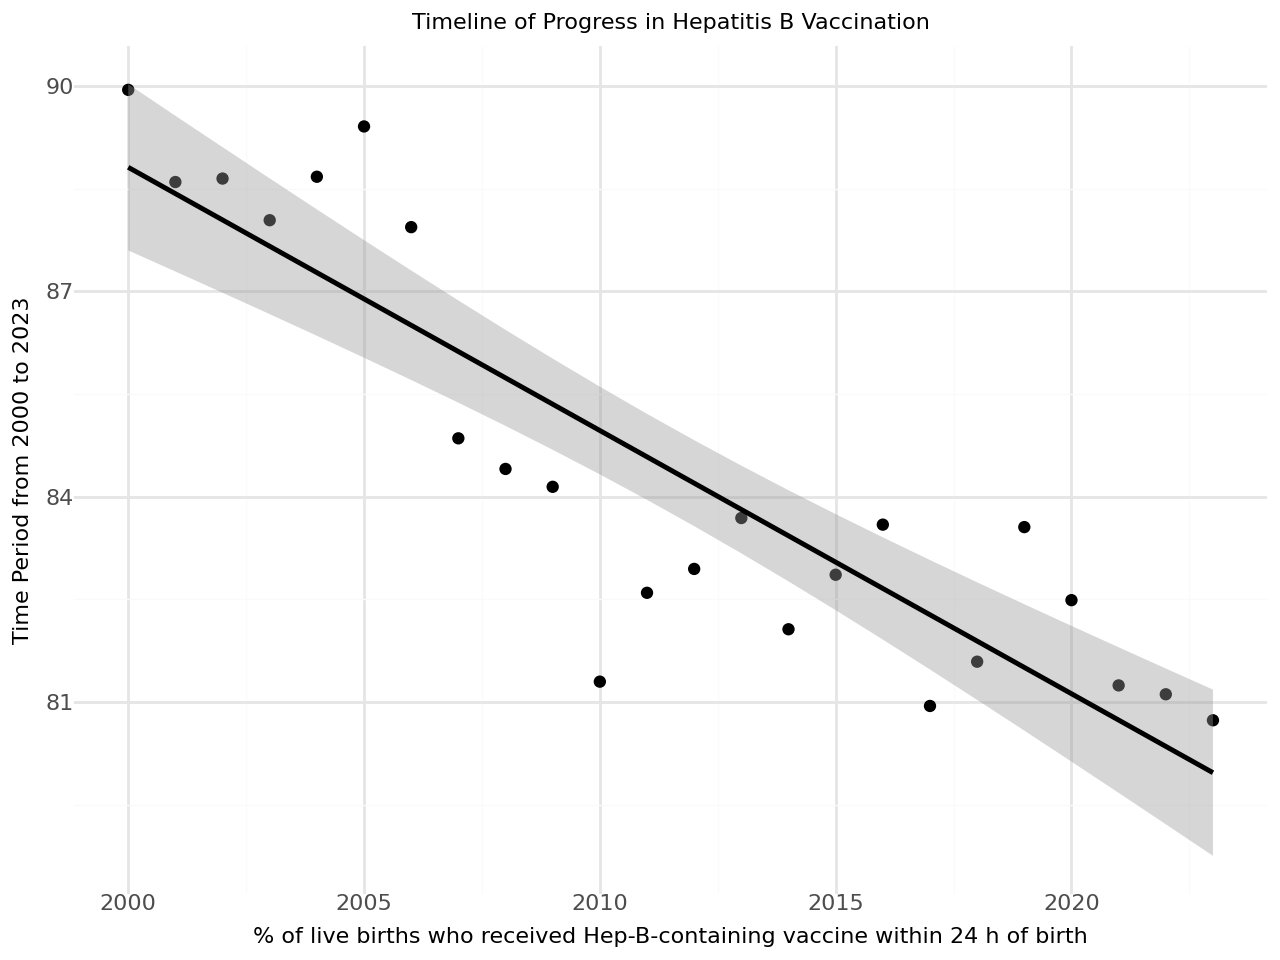

In [113]:

(ggplot(mean_observed_value)
  + aes(x="time_period", y="obs_value")
  + geom_point()
  + geom_smooth(method="lm")
  + theme_minimal()
  + labs(
      x="% of live births who received Hep-B-containing vaccine within 24 h of birth",
      y="Time Period from 2000 to 2023",
      title="Timeline of Progress in Hepatitis B Vaccination"
  )
  + theme(text=element_text(size=8))
)

# A World Map chart
The world map lights up as the story is told of new babies getting their first protection against Hepatitis B. Countries shade from fiery red to sunflower yellow, to indicate the percentage of babies vaccinated 24 hours after birth. In yellow-shimmering patches, more than 75% of newborns get prompt protection, but streaks of orange and red show areas where fewer babies get their doses on time. Down With a deadly bureaucracy Down is how it goes, the staggered yet resolute march of the world's efforts to ensure each child is given a safer start in life.



In [114]:
#| echo: false
shape_world = gp.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")

In [115]:
#| echo: false
csv_data_2023 = (csv_data.filter(pl.col("time_period") == 2023)
)

In [116]:
#| echo: false
map_2023 = (shape_world
  .merge(csv_data_2023.to_pandas(), left_on="name", right_on="country", how="outer")
)

In [117]:
#| echo: false
# 1. Read the csv file containing the iso3 convention for all spellings
country_code = pl.read_csv("https://raw.githubusercontent.com/adrivsh/country_names/refs/heads/master/names_to_iso.csv")
# 2. Join country_code and gapminder to identify the iso3 code for each country
map_2023_code = (csv_data_2023.join(country_code, on="country", how="left"))
# 3. Merge the values with the shape file for each country using the iso3
csv_data_2023_coded = (shape_world
  .merge(map_2023_code.to_pandas(), on="iso3", how="outer")
)

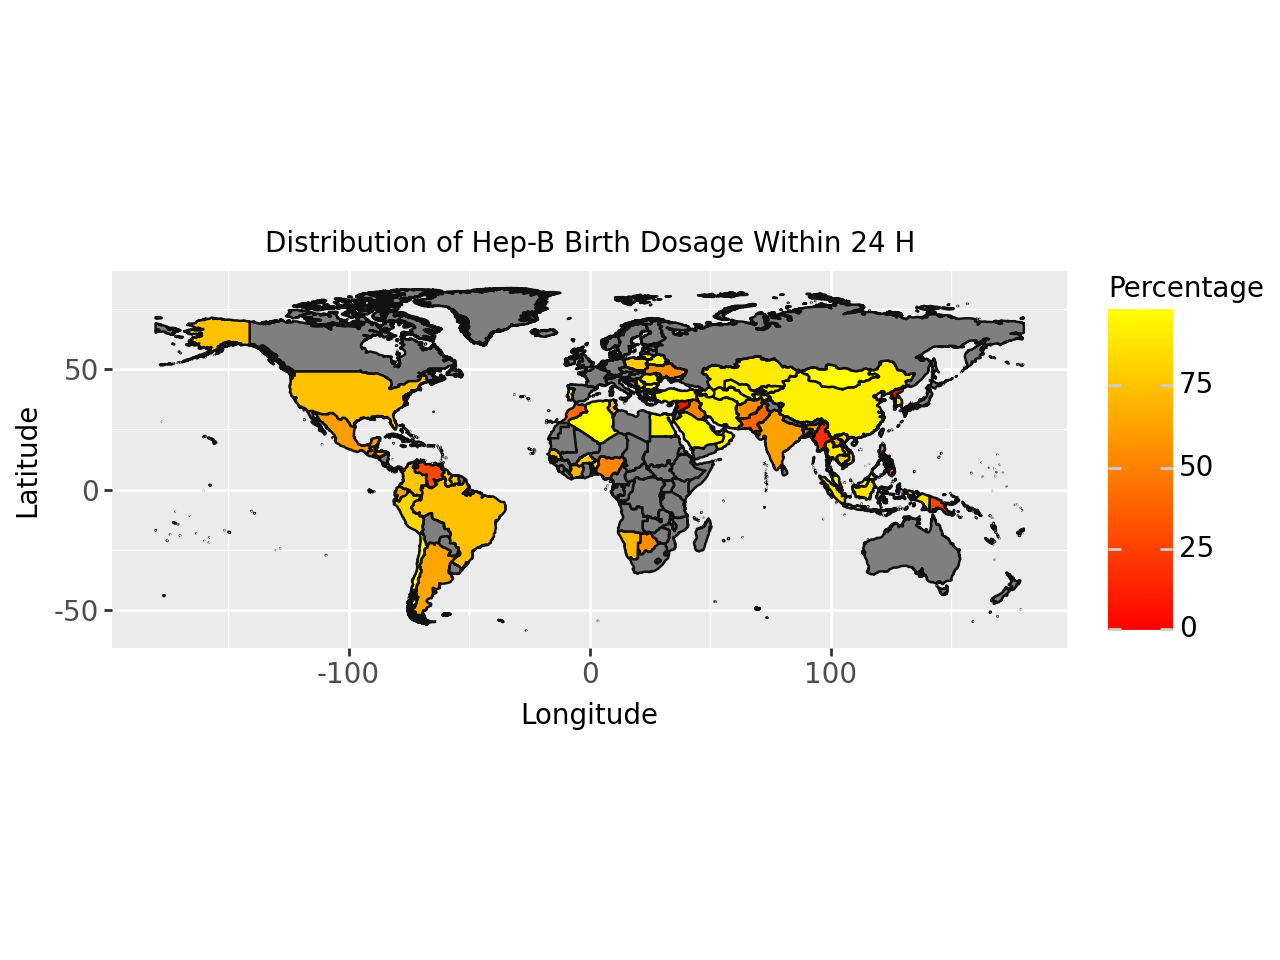

In [118]:

(ggplot(data=csv_data_2023_coded)
  + aes(fill="obs_value")
  + geom_map()
  + scale_fill_gradient(low="red", high="yellow")
  + labs(
      title="Distribution of Hep-B Birth Dosage Within 24 H",
      x="Longitude",
      y="Latitude",
      fill="Percentage"
  )
  + coord_fixed()
  + theme(text=element_text(size=10))
)

# A time-series chart
For the past several decades, the global rhythm of birth rates has been slowing. It's a very simple but very powerful black line, capturing 1960 to 2023, that is a constant descent toward fewer births per 1,000 people. The line drops lower for year after year, and succeeds in capturing a world that is undergoing deep social, economic and health changes. What begins as a precipitous drop in the early years tapers off around the present day, capturing a new world where smaller families have become the rule, not the exception, in much of the world.



In [119]:
#| echo: false
mean_metadata = csv_metadata.group_by("year", maintain_order=True).mean()

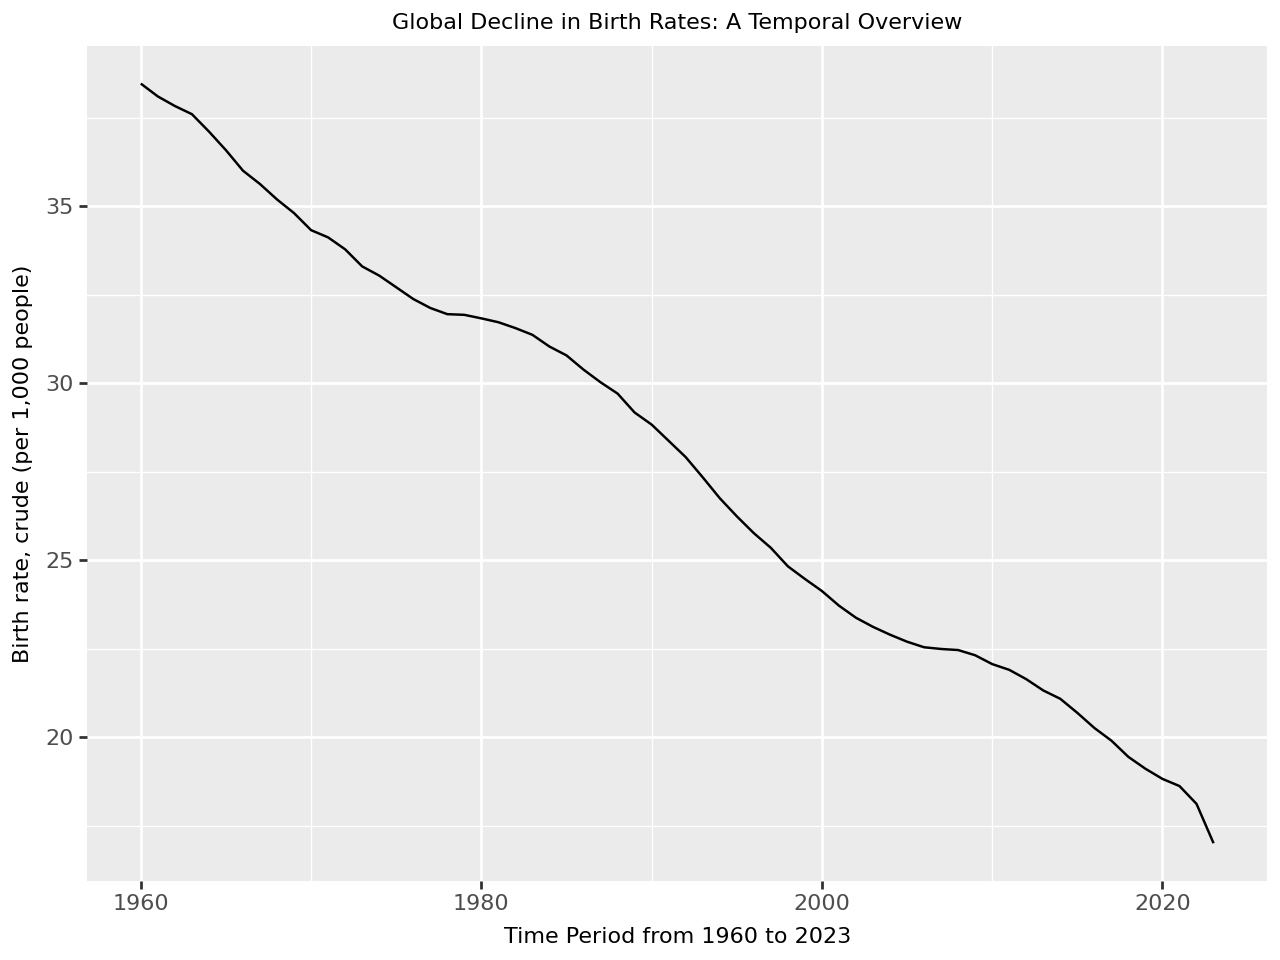

In [120]:

(ggplot(mean_metadata)
  + aes(x="year", y="Birth rate, crude (per 1,000 people)")
  + geom_line()
  + labs(
      x="Time Period from 1960 to 2023",
      y="Birth rate, crude (per 1,000 people)",
      title="Global Decline in Birth Rates: A Temporal Overview"
  )
  + theme(text=element_text(size=8))
)

# A bar chart
In the race for longevity, a small number of countries have pulled ahead. The above colorful bar chart emphasizes the Cayman Islands, Faroe Islands, Iceland, Japan, and Liechtenstein are the five countries with the highest average life expectancies at birth from 1960 to 2023. That narrative unfolds as towering bars, each painted in a bright hue of its own, recount the story of communities where good health, prosperity and quality of life converge. And though tiny in stature, these countries loom large in years lived a window into what makes a longer, healthier life possible.

In [121]:
#| echo: false
mean_metadata_2 = csv_metadata.group_by("country", maintain_order=True).mean()
top_10_metadata = mean_metadata_2.select(
    pl.all().top_k_by("Life expectancy at birth, total (years)", 5)
)

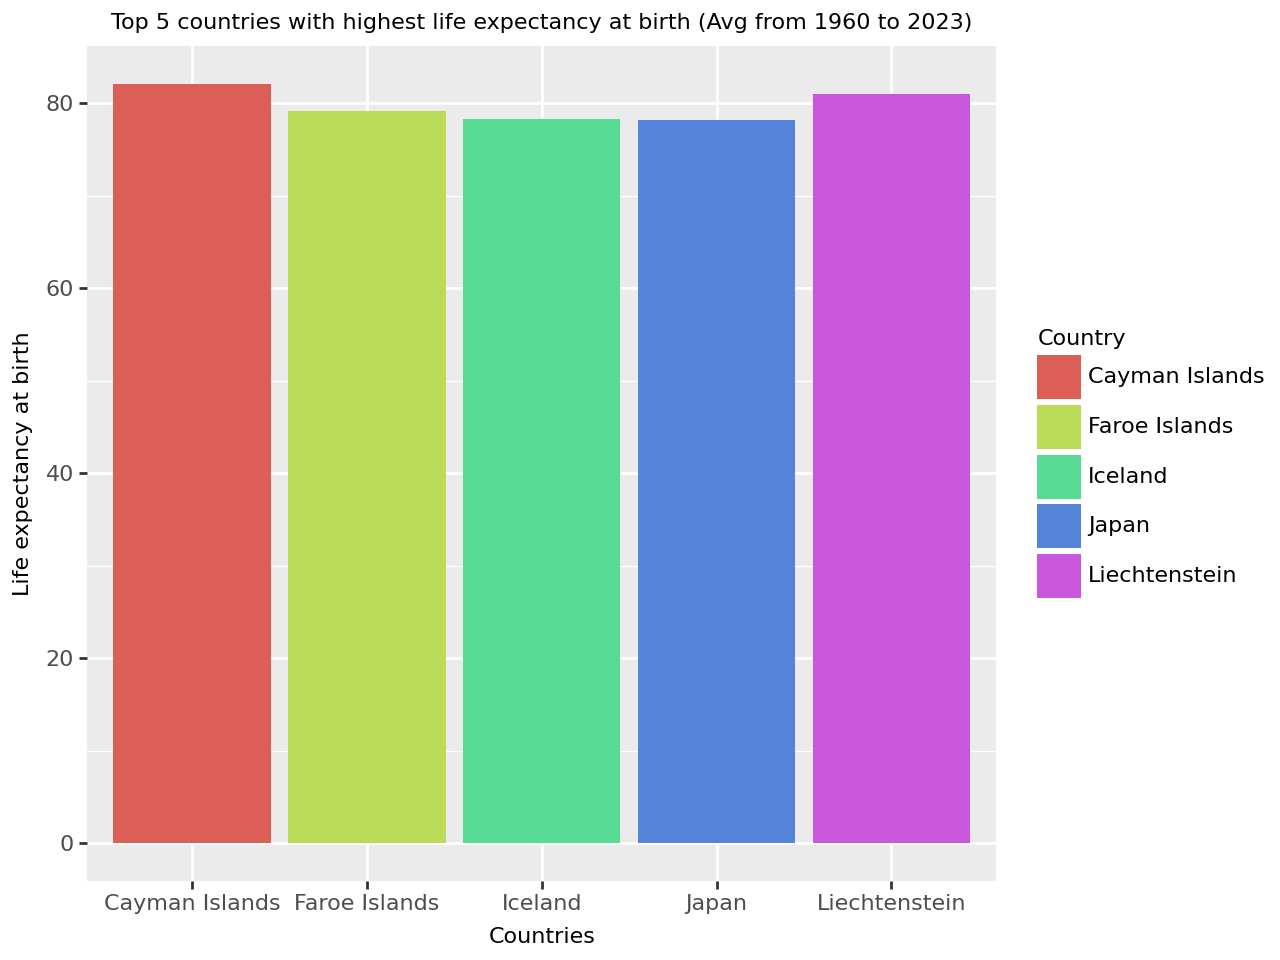

In [122]:

(ggplot(top_10_metadata)
  + aes(x="country", y="Life expectancy at birth, total (years)", fill="country")
  + geom_col()
  + labs(
      x="Countries",
      y="Life expectancy at birth",
      title="Top 5 countries with highest life expectancy at birth (Avg from 1960 to 2023)",
      fill="Country"
  )
  + theme(text=element_text(size=8))
)

# Conclusion

These charts show steady global progress in health over time. Hepatitis B vaccination rates have improved, though unevenly across regions. Meanwhile, declining birth rates reflect broader social and healthcare advances. Together, they highlight a world moving toward better health and longer lives.

